# Lecture 5: Many Particles Systems

We will now be looking into systems with *many* particles. We will extend our previous code to handle many particles and also look at how to handle the interactions between them. These particles are no longer passive and can alter the fields that they are in.

### Time Integration

Each particle will have their position and velocity updated by an explicit Leapfrog method. We have previously looked at the Leapfrog method in a form of `Heun_step`.

In [ ]:
def Heun_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h, y + h * k1)
    return y + 0.5 * h * (k1 + k2)

An alternative form of the Leapfrog method is given by a mneumonic 'kick-drift-kick' method.

$$
\begin{aligned}
\mathbf{v}_{n+1 / 2} & =\mathbf{v}_n+\frac{\Delta t}{2} \cdot \mathbf{a}_n \\
\mathbf{x}_{n+1} & = \mathbf{x}_n+\Delta t \cdot \mathbf{v}_{n+1 / 2} \\
\mathbf{v}_{n+1} & =\mathbf{v}_{n+1 / 2}+\frac{\Delta t}{2} \cdot \mathbf{a}_{n+1}
\end{aligned}
$$

Show that the two are equivalent.

## 1. Gravitational N-body Simulation

We will now look at a system of $N$ particles interacting via gravity, indexed by $i=1, \ldots, N$. Each particle has a:
- mass $m_i$,
- position $r_i=\left[x_i, y_i, z_i\right]$,
- velocity $\mathrm{v}_i=\left[\mathrm{vx}_i, \mathrm{v}_i, \mathrm{v}_i\right]$

The acceleration on a particle $i$ is given by

$$
\mathbf{a}_{i}= G \sum_{j \neq i}^N \frac{ m_{j}\left(\mathbf{x}_{j}-\mathbf{x}_{i}\right)}{\left|\mathbf{x}_{j}-\mathbf{x}_{i}\right|^{3}}
$$

where $G$ is the gravitational constant, $m_j$ is the mass of particle $j$ and $\mathbf{x}_j$ is the position of particle $j$.

**Write a simulation of this system. Vectorize your code and plot the trajectories of the particles in the centre of mass frame.**

In [ ]:
def gravitational_acceleration(x):
    a = 0
    return a


### 1.1 Energy Evolution.

For $N \geq 100$, find an evolution of kinetic and potential energy. Prove that the virial theorem holds for this system.

> **Virial Theorem**
>
>The time-averaged kinetic energy of a bound system is equal to minus half of its time-averaged potential energy, i.e.,
>
>$$
>2\langle K\rangle=-\langle U\rangle
>$$
>
>$\langle U\rangle$ represents the time-averaged potential energy. The virial theorem is a powerful tool in astrophysics >and statistical mechanics for understanding the equilibrium and stability of systems.

In [ ]:
### solution to 1.1



### 1.2 The Three Body Problem

The three-body problem involves predicting the motion of three celestial bodies influenced by mutual gravitational attraction. Unlike the two-body problem, the gravitational interactions in three-body systems often result in chaotic and unpredictable orbital dynamics. Analytical solutions for the general three-body problem are elusive, requiring numerical methods and simulations. This complexity makes it a challenging yet crucial aspect of celestial mechanics, impacting our understanding of planetary motion and celestial dynamics. Ongoing research continues to delve into the intricate orbital patterns that emerge in these systems.

<!-- <div style="text-align:center">
    <figure>
        <img src="https://upload.wikimedia.org/wikipedia/commons/5/5a/5_4_800_36_downscaled.gif" alt="3body-problem" style="width: 600px;background-color: white;">
        <figcaption>Fig.1 20 examples of periodic solutions to the three-body problem. (Canagrisa, Wikipedia)</figcaption>
    </figure>
</div> -->

<div style="text-align:center">
    <figure>
        <img src="three_body_problem.gif" alt="3body-problem" style="width: 600px;background-color: white;">
        <figcaption>Fig.1 20 examples of periodic solutions to the three-body problem. (Canagrisa, Wikipedia)</figcaption>
    </figure>
</div>


We will now look at a system of three particles interacting via gravity, indexed by $i=1,2,3$. Can you find a stable orbit for the three body system? What happens when you change the initial conditions? If your solution is not stable, what does it do?

In [ ]:
## solution to 1.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

"""
Create Your Own N-body Simulation (With Python)
Philip Mocz (2020) Princeton Univeristy, @PMocz

Simulate orbits of stars interacting due to gravity
Code calculates pairwise forces according to Newton's Law of Gravity
"""

def getAcc( pos, mass, G, softening ):
	"""
    Calculate the acceleration on each particle due to Newton's Law 
	pos  is an N x 3 matrix of positions
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	softening is the softening length
	a is N x 3 matrix of accelerations
	"""
	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r^3 for all particle pairwise particle separations 
	inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)
	inv_r3[inv_r3>0] = inv_r3[inv_r3>0]**(-1.5)

	ax = G * (dx * inv_r3) @ mass
	ay = G * (dy * inv_r3) @ mass
	az = G * (dz * inv_r3) @ mass
	
	# pack together the acceleration components
	a = np.hstack((ax,ay,az))

	return a
	
def getEnergy( pos, vel, mass, G ):
	"""
	Get kinetic energy (KE) and potential energy (PE) of simulation
	pos is N x 3 matrix of positions
	vel is N x 3 matrix of velocities
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	KE is the kinetic energy of the system
	PE is the potential energy of the system
	"""
	# Kinetic Energy:
	KE = 0.5 * np.sum(np.sum( mass * vel**2 ))


	# Potential Energy:

	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r for all particle pairwise particle separations 
	inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
	inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]

	# sum over upper triangle, to count each interaction only once
	PE = G * np.sum(np.sum(np.triu(-(mass*mass.T)*inv_r,1)))
	
	return KE, PE

""" N-body simulation """

# Simulation parameters
N         = 100    # Number of particles
t         = 0      # current time of the simulation
tEnd      = 10.0   # time at which simulation ends
dt        = 0.01   # timestep
softening = 0.1    # softening length
G         = 1.0    # Newton's Gravitational Constant
plotRealTime = True # switch on for plotting as the simulation goes along

# Generate Initial Conditions
np.random.seed(17)            # set the random number generator seed

mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
pos  = np.random.randn(N,3)   # randomly selected positions and velocities
vel  = np.random.randn(N,3)

# Convert to Center-of-Mass frame
vel -= np.mean(mass * vel,0) / np.mean(mass)

# calculate initial gravitational accelerations
acc = getAcc( pos, mass, G, softening )

# calculate initial energy of system
KE, PE  = getEnergy( pos, vel, mass, G )

# number of timesteps
Nt = int(np.ceil(tEnd/dt))

# save energies, particle orbits for plotting trails
pos_save = np.zeros((N,3,Nt+1))
pos_save[:,:,0] = pos
KE_save = np.zeros(Nt+1)
KE_save[0] = KE
PE_save = np.zeros(Nt+1)
PE_save[0] = PE
t_all = np.arange(Nt+1)*dt

# prep figure
fig = plt.figure(figsize=(4,5), dpi=80)
grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3)
ax1 = plt.subplot(grid[0:2,0])
ax2 = plt.subplot(grid[2,0])

# Simulation Main Loop
for i in range(Nt):
    # (1/2) kick
    vel += acc * dt/2.0
    
    # drift
    pos += vel * dt
    
    # update accelerations
    acc = getAcc( pos, mass, G, softening )
    
    # (1/2) kick
    vel += acc * dt/2.0
    
    # update time
    t += dt
    
    # get energy of system
    KE, PE  = getEnergy( pos, vel, mass, G )
    
    # save energies, positions for plotting trail
    pos_save[:,:,i+1] = pos
    KE_save[i+1] = KE
    PE_save[i+1] = PE
    
    # plot in real time
    if plotRealTime or (i == Nt-1):
        # plt.clf()  # Clear the entire figure
        plt.sca(ax1)
        plt.cla()
        xx = pos_save[:,0,max(i-50,0):i+1]
        yy = pos_save[:,1,max(i-50,0):i+1]
        plt.scatter(xx,yy,s=1,color=[.7,.7,1])
        plt.scatter(pos[:,0],pos[:,1],s=10,color='blue')
        ax1.set(xlim=(-2, 2), ylim=(-2, 2))
        ax1.set_aspect('equal', 'box')
        ax1.set_xticks([-2,-1,0,1,2])
        ax1.set_yticks([-2,-1,0,1,2])
        
        plt.sca(ax2)
        plt.cla()
        plt.scatter(t_all,KE_save,color='red',s=1,label='KE' if i == Nt-1 else "")
        plt.scatter(t_all,PE_save,color='blue',s=1,label='PE' if i == Nt-1 else "")
        plt.scatter(t_all,KE_save+PE_save,color='black',s=1,label='Etot' if i == Nt-1 else "")
        ax2.set(xlim=(0, tEnd), ylim=(-300, 300))
        ax2.set_aspect(0.007)
        
        plt.pause(0.001)
    


# add labels/legend
plt.sca(ax2)
plt.xlabel('time')
plt.ylabel('energy')
ax2.legend(loc='upper right')

# Save figure
plt.savefig('nbody.png',dpi=240)
plt.show()


## Creating figures

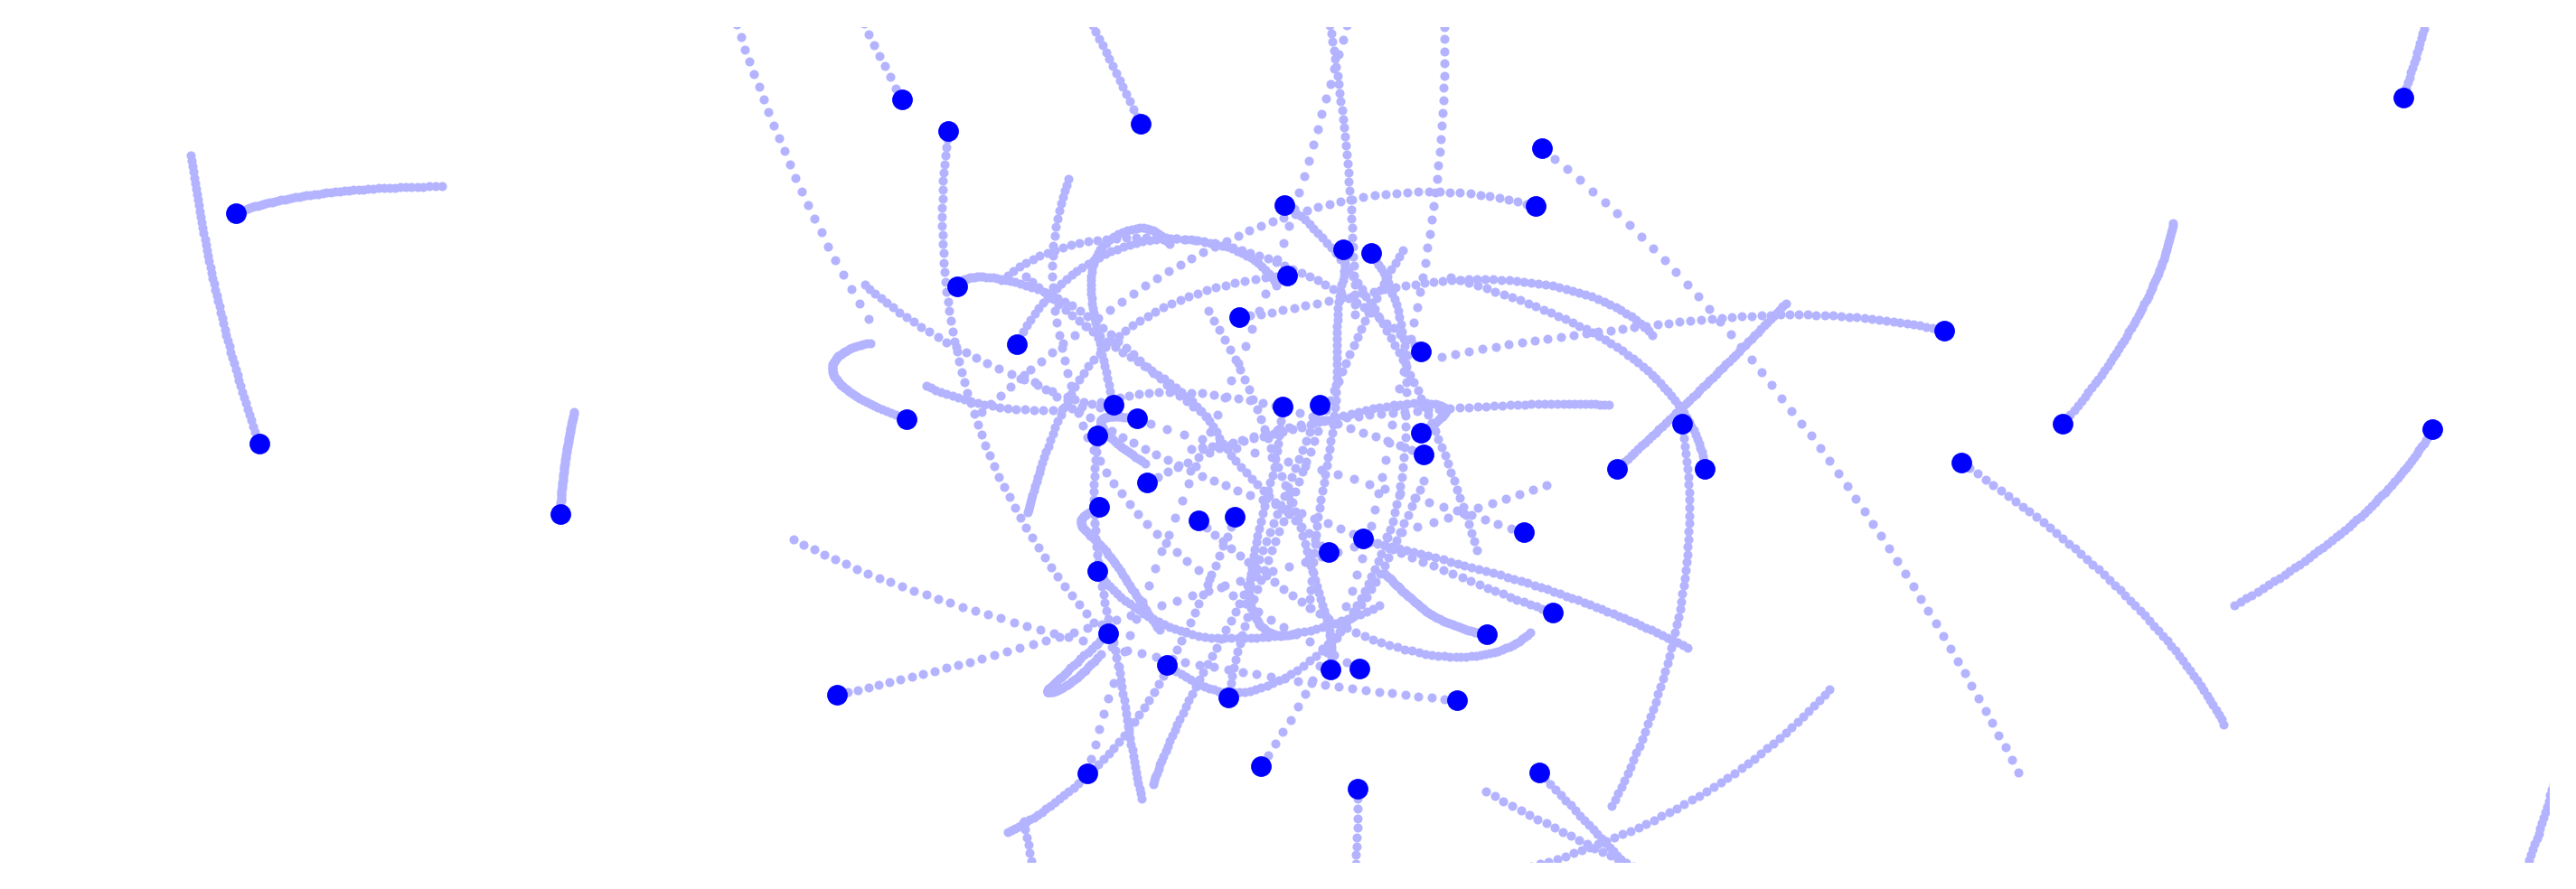

In [20]:
import numpy as np
import matplotlib.pyplot as plt

"""
Create Your Own N-body Simulation (With Python)
Philip Mocz (2020) Princeton Univeristy, @PMocz

Simulate orbits of stars interacting due to gravity
Code calculates pairwise forces according to Newton's Law of Gravity
"""

def getAcc( pos, mass, G, softening ):
	"""
    Calculate the acceleration on each particle due to Newton's Law 
	pos  is an N x 3 matrix of positions
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	softening is the softening length
	a is N x 3 matrix of accelerations
	"""
	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r^3 for all particle pairwise particle separations 
	inv_r3 = (dx**2 + dy**2 + dz**2 + softening**2)
	inv_r3[inv_r3>0] = inv_r3[inv_r3>0]**(-1.5)

	ax = G * (dx * inv_r3) @ mass
	ay = G * (dy * inv_r3) @ mass
	az = G * (dz * inv_r3) @ mass
	
	# pack together the acceleration components
	a = np.hstack((ax,ay,az))

	return a
	
def getEnergy( pos, vel, mass, G ):
	"""
	Get kinetic energy (KE) and potential energy (PE) of simulation
	pos is N x 3 matrix of positions
	vel is N x 3 matrix of velocities
	mass is an N x 1 vector of masses
	G is Newton's Gravitational constant
	KE is the kinetic energy of the system
	PE is the potential energy of the system
	"""
	# Kinetic Energy:
	KE = 0.5 * np.sum(np.sum( mass * vel**2 ))


	# Potential Energy:

	# positions r = [x,y,z] for all particles
	x = pos[:,0:1]
	y = pos[:,1:2]
	z = pos[:,2:3]

	# matrix that stores all pairwise particle separations: r_j - r_i
	dx = x.T - x
	dy = y.T - y
	dz = z.T - z

	# matrix that stores 1/r for all particle pairwise particle separations 
	inv_r = np.sqrt(dx**2 + dy**2 + dz**2)
	inv_r[inv_r>0] = 1.0/inv_r[inv_r>0]

	# sum over upper triangle, to count each interaction only once
	PE = G * np.sum(np.sum(np.triu(-(mass*mass.T)*inv_r,1)))
	
	return KE, PE

""" N-body simulation """

# Simulation parameters
N         = 100    # Number of particles
t         = 0      # current time of the simulation
tEnd      = 10.0   # time at which simulation ends
dt        = 0.01   # timestep
softening = 0.1    # softening length
G         = 1.0    # Newton's Gravitational Constant
plotRealTime = True # switch on for plotting as the simulation goes along

# Generate Initial Conditions
np.random.seed(17)            # set the random number generator seed

mass = 20.0*np.ones((N,1))/N  # total mass of particles is 20
pos  = np.random.randn(N,3)   # randomly selected positions and velocities
# scale y-position by a factor of 3
pos[:,1] *= 3
vel  = np.random.randn(N,3)

# Convert to Center-of-Mass frame
vel -= np.mean(mass * vel,0) / np.mean(mass)

# calculate initial gravitational accelerations
acc = getAcc( pos, mass, G, softening )

# calculate initial energy of system
KE, PE  = getEnergy( pos, vel, mass, G )

# number of timesteps
Nt = int(np.ceil(tEnd/dt))

# save energies, particle orbits for plotting trails
pos_save = np.zeros((N,3,Nt+1))
pos_save[:,:,0] = pos
KE_save = np.zeros(Nt+1)
KE_save[0] = KE
PE_save = np.zeros(Nt+1)
PE_save[0] = PE
t_all = np.arange(Nt+1)*dt

# prep figure
fig = plt.figure(figsize=(12,4), dpi=300)
# grid = plt.GridSpec(3, 1, wspace=0.0, hspace=0.3)
# ax1 = plt.subplot(grid[0:2,0])
# ax2 = plt.subplot(grid[2,0])

# Simulation Main Loop
for i in range(Nt):
    # (1/2) kick
    vel += acc * dt/2.0
    
    # drift
    pos += vel * dt
    
    # update accelerations
    acc = getAcc( pos, mass, G, softening )
    
    # (1/2) kick
    vel += acc * dt/2.0
    
    # update time
    t += dt
    
    # get energy of system
    KE, PE  = getEnergy( pos, vel, mass, G )
    
    # save energies, positions for plotting trail
    pos_save[:,:,i+1] = pos
    KE_save[i+1] = KE
    PE_save[i+1] = PE
    
    # plot in real time
    # if plotRealTime or (i == Nt-1):
        # plt.clf()  # Clear the entire figure
# plt.sca(ax1)
# plt.cla()
xx = pos_save[:,0,max(i-50,0):i+1]
yy = pos_save[:,1,max(i-50,0):i+1]
plt.scatter(xx,yy,s=2,color=[.7,.7,1])
plt.scatter(pos[:,0],pos[:,1],s=20,color='blue')
# ax1.set(xlim=(-2, 2), ylim=(-2, 2))
# ax1.set_aspect('equal', 'box')
# ax1.set_xticks([-2,-1,0,1,2])
# ax1.set_yticks([-2,-1,0,1,2])
plt.xlim(-3, 3)
plt.ylim(-1, 1)
plt.axis('off')
plt.savefig('chap5-nbody.png', dpi=300, bbox_inches='tight')
# plt.sca(ax2)
# plt.cla()
# plt.scatter(t_all,KE_save,color='red',s=1,label='KE' if i == Nt-1 else "")
# plt.scatter(t_all,PE_save,color='blue',s=1,label='PE' if i == Nt-1 else "")
# plt.scatter(t_all,KE_save+PE_save,color='black',s=1,label='Etot' if i == Nt-1 else "")
# ax2.set(xlim=(0, tEnd), ylim=(-300, 300))
# ax2.set_aspect(0.007)

# plt.pause(0.001)
    


# add labels/legend
# plt.sca(ax2)
# plt.xlabel('time')
# plt.ylabel('energy')
# ax2.legend(loc='upper right')

# Save figure
# plt.savefig('nbody.png',dpi=240)
# plt.show()


## 2. 1D Two-Stream Instability

<ins>Reference</ins>:
- https://en.wikipedia.org/wiki/Two-stream_instability
- Philip Mocz, *Create Your Own Plasma PIC Simulation (With Python)*, Medium 2020

The two-stream instability is a collective instability of a plasma. It is a parametric instability driven by the interaction of two counter-propagating waves of similar frequency. The instability is driven by the interaction of the waves with the electrons in the plasma. The electrons are accelerated by the electric field of the waves, and the waves are modified by the motion of the electrons.

<div style="text-align:center">
    <figure>
        <img src="twostream.png" alt="twostream" style="width: 600px;background-color: white;">
        <figcaption>Fig.2 Phase Diagram of Two-Stream Instability. </figcaption>
    </figure>
</div>

We will consider a one-dimensional system of electrons in an unmagnetized uniform medium of ions. Each electron has a position $x_i$ and velocity $v_i$. The velocity and acceleration on a particle $i$ is given by

$$
\begin{gathered}
\frac{d r_i}{d t}=v_i \\
\frac{d v_i}{d t}=a_i=-E\left(r_i\right)
\end{gathered}
$$

### 2.1 Solving Poisson Equation

We showed in the previous lecture that we can solve Poisson equation using Gauss-Seidel method. Here we will solve the Poisson equation using `spsolve`.

The `spsolve` function in the `scipy.sparse.linalg` module of Python's `scipy` library is designed for efficiently solving sparse linear systems of equations in the form

$$Ax = b.$$ 

For matrix $A$ and vectors $x$ and $b$. An example can be founded below.

In [ ]:
import numpy as np
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix

# Create a sparse matrix (in CSR format)
A_sparse = csr_matrix([[1, 0, 0], [0, 2, 0], [0, 0, 3]])

# Right-hand side vector
b = np.array([4, 6, 9])

# Solve the linear system Ax = b
x = spsolve(A_sparse, b)

print(x)


An electric potential $\phi$ satisfies the 1D Poisson equation
$$
\begin{aligned}
E(x) & =-\frac{d \phi}{d x} \\
\frac{d^2 \phi(x)}{d x^2} & =n-n_0
\end{aligned}
$$

where we can use finite difference to discretize the equation

$$
\frac{d^2 \phi\left(x_j\right)}{d x^2} \simeq \frac{\phi_{j-1}-2 \phi_j+\phi_{j+1}}{(\Delta x)^2}
$$

The equation can be written as a system of linear equations in matrix form:

$$
\frac{1}{(\Delta x)^2}\left[\begin{array}{cccccc}
-2 & 1 & & & \cdots & 1 \\
1 & -2 & 1 & & & \\
& 1 & -2 & 1 & & \\
\vdots & & & \ddots & & \\
& & & 1 & -2 & 1 \\
1 & & & & 1 & -2
\end{array}\right]\left[\begin{array}{c}
\phi_1 \\
\phi_2 \\
\phi_3 \\
\vdots \\
\phi_{m-1} \\
\phi_m
\end{array}\right]=\left[\begin{array}{c}
n_1 \\
n_2 \\
n_3 \\
\vdots \\
n_{m-1} \\
n_m
\end{array}\right]-n_0
$$

The matrix represents the Laplacian operator and is sparse and tridiagonal. Here we have assumed periodic boundary conditions. An example is given below.

In [ ]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt

# Parameters
m = 100  # Number of grid points
L = 1.0  # Length of the domain
dx = L / m  # Grid spacing
n0 = 0.0  # Background charge density
n_values = 2 * np.sin(2 * np.pi * np.linspace(0, 1, m))  # Different charge density values
E_values = np.zeros(m)  # Array for electric field at each grid point

# Construct the tridiagonal matrix for Laplacian operator with periodic boundary conditions
main_diag = -2 * np.ones(m)
off_diag = np.ones(m - 1)
laplacian_matrix = diags([off_diag, main_diag, off_diag], [-1, 0, 1], shape=(m, m)).toarray()
laplacian_matrix[0, -1] = 1  # Periodic boundary condition at x=0
laplacian_matrix[-1, 0] = 1  # Periodic boundary condition at x=L
laplacian_matrix /= dx**2

# Solve the system of linear equations
phi_values = spsolve(laplacian_matrix, n_values - n0)

# Plot the results
x_values = np.linspace(0, L, m, endpoint=False)
plt.plot(x_values, phi_values, label='Electric Potential ($\phi$)')
plt.xlabel('Position (x)')
plt.ylabel('Electric Potential')
plt.title('Solution to 1D Poisson Equation with Periodic Boundary Conditions')
plt.legend()
plt.show()


### 2.2 Electric Field Calculation

We find the electric field from gradient of the potential $E = - \nabla \phi$, where we can approximate the gradient using finite difference

$$
\frac{d \phi\left(x_j\right)}{d x} \simeq \frac{\phi_{j+1}-\phi_{j-1}}{2 \Delta x}
$$

We could also can calculate this gradient as a matrix multiplication

$$
\left[\begin{array}{c}
E_1 \\
E_2 \\
E_3 \\
\vdots \\
E_{m-1} \\
E_m
\end{array}\right]=-\frac{1}{2 \Delta x}\left[\begin{array}{cccccc}
0 & 1 & & & \cdots & -1 \\
-1 & 0 & 1 & & & \\
& -1 & 0 & 1 & & \\
\vdots & & & \ddots & & \\
& & & -1 & 0 & 1 \\
1 & & & & -1 & 0
\end{array}\right]\left[\begin{array}{c}
\phi_1 \\
\phi_2 \\
\phi_3 \\
\vdots \\
\phi_{m-1} \\
\phi_m
\end{array}\right]
$$

Given the potential $\phi$ found above, calculate the electric field $E$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 100  # Number of grid points
L = 1.0  # Length of the domain
dx = L / m  # Grid spacing

# Function to calculate electric field from potential
def calculate_electric_field(phi_values, dx):
    # Construct the matrix for finite difference gradient
    gradient_matrix = -0.5 * (np.roll(np.eye(m), 1, axis=1) - np.roll(np.eye(m), -1, axis=1))
    gradient_matrix[0, -1] = -0.5  # Adjust for periodic boundary conditions
    gradient_matrix[-1, 0] = 0.5   # Adjust for periodic boundary conditions

    # Calculate electric field using matrix multiplication
    electric_field_values = np.dot(gradient_matrix, phi_values) / dx

    return electric_field_values

# Example: Using the phi_values from the previous example
phi_values = spsolve(laplacian_matrix, n_values - n0)

# Calculate the electric field
electric_field_values = calculate_electric_field(phi_values, dx)

# Plot the electric field
x_values = np.linspace(0, L, m, endpoint=False)
plt.plot(x_values, electric_field_values, label='Electric Field ($E$)')
plt.xlabel('Position (x)')
plt.ylabel('Electric Field')
plt.title('Electric Field Calculation from Potential')
plt.legend()
plt.show()


### 2.3 Density Calculation

The density is obtained by binning the particles onto the mesh gridpoints. 

$$
\begin{aligned}
& n_j+=\frac{x_{j+1}-r_i}{\Delta x} \\
& n_{j+1}+=\frac{r_i-x_j}{\Delta x}
\end{aligned}
$$

We can use `np.bincount` for this process.

And electric field is calculated by interpolation

$$
E_i=\frac{x_{j+1}-r_i}{\Delta x} E_j+\frac{r_i-x_j}{\Delta x} E_{j+1}
$$

### 2.4 Simulate the streaming instability

We can start with the initial condition below. The initial condition is a Gaussian distribution of particles with a small perturbation.

In [ ]:
import numpy as np

# Example Simulation parameters
num_particles = 40000   # Number of particles
num_cells = 400     # Number of mesh cells
current_time = 0       # Current time of the simulation
end_time = 50      # Time at which simulation ends
time_step = 1       # Timestep
domain_size = 50      # Periodic domain [0, domain_size]
electron_density = 1       # Electron number density
beam_velocity = 3       # Beam velocity
beam_width = 1       # Beam width
perturbation = 0.1     # Perturbation

#  Initial Condition
# construct 2 opposite-moving Gaussian beams
positions = np.random.rand(num_particles, 1) * domain_size
velocities = beam_width * np.random.randn(num_particles, 1) + beam_velocity
half_particles = int(num_particles / 2)
velocities[half_particles:] *= -1
# add perturbation
velocities *= (1 + perturbation * np.sin(2 * np.pi * positions / domain_size))

### 2.5 Phase Space

Phase space is a mathematical concept commonly used in physics and dynamical systems theory to describe the collective behavior of a system of particles or objects. It is a multi-dimensional space where each point represents a unique state of the system, typically defined by the positions and momenta of the constituent particles. In classical mechanics, the phase space is a 6N-dimensional space, where N is the number of particles, accommodating the three spatial coordinates and their corresponding momenta for each particle. Trajectories in phase space depict the time evolution of a system, offering insights into its dynamics and revealing patterns such as periodic orbits or chaotic behavior.

Plot the phase space $(\mathbf{x},\mathbf{v})$ of the particles. What do you see?

In [ ]:
# 2.5 Phase Space

### 2.6 Growth Rate

Experiment with your code and determine the growth rate of the instability. How does it depend on the number of particles? How does it depend on the number of grid points? How does it depend on the initial perturbation?

In [ ]:
# 2.6 Growth Rate

# Solution



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from IPython.display import display, clear_output

"""
Create Your Own Plasma PIC Simulation (With Python)
Philip Mocz (2020) Princeton Univeristy, @PMocz

Simulate the 1D Two-Stream Instability
Code calculates the motions of electron under the Poisson-Maxwell equation
using the Particle-In-Cell (PIC) method

"""


def getAcc( pos, Nx, boxsize, n0, Gmtx, Lmtx ):
	"""
    Calculate the acceleration on each particle due to electric field
	pos      is an Nx1 matrix of particle positions
	Nx       is the number of mesh cells
	boxsize  is the domain [0,boxsize]
	n0       is the electron number density
	Gmtx     is an Nx x Nx matrix for calculating the gradient on the grid
	Lmtx     is an Nx x Nx matrix for calculating the laplacian on the grid
	a        is an Nx1 matrix of accelerations
	"""
	# Calculate Electron Number Density on the Mesh by 
	# placing particles into the 2 nearest bins (j & j+1, with proper weights)
	# and normalizing
	N          = pos.shape[0]
	dx         = boxsize / Nx
	j          = np.floor(pos/dx).astype(int)
	jp1        = j+1
	weight_j   = ( jp1*dx - pos  )/dx
	weight_jp1 = ( pos    - j*dx )/dx
	jp1        = np.mod(jp1, Nx)   # periodic BC
	n  = np.bincount(j[:,0],   weights=weight_j[:,0],   minlength=Nx);
	n += np.bincount(jp1[:,0], weights=weight_jp1[:,0], minlength=Nx);
	n *= n0 * boxsize / N / dx 
	
	# Solve Poisson's Equation: laplacian(phi) = n-n0
	phi_grid = spsolve(Lmtx, n-n0, permc_spec="MMD_AT_PLUS_A")
	
	# Apply Derivative to get the Electric field
	E_grid = - Gmtx @ phi_grid
	
	# Interpolate grid value onto particle locations
	E = weight_j * E_grid[j] + weight_jp1 * E_grid[jp1]
	
	a = -E

	return a


# Simulation parameters
N         = 40000   # Number of particles
Nx        = 400     # Number of mesh cells
t         = 0       # current time of the simulation
tEnd      = 50      # time at which simulation ends
dt        = 1       # timestep
boxsize   = 50      # periodic domain [0,boxsize]
n0        = 1       # electron number density
vb        = 3       # beam velocity
vth       = 1       # beam width
A         = 0.001     # perturbation
plotRealTime = True # switch on for plotting as the simulation goes along

# Generate Initial Conditions
np.random.seed(42)            # set the random number generator seed
# construct 2 opposite-moving Guassian beams
pos  = np.random.rand(N,1) * boxsize  
vel  = vth * np.random.randn(N,1) + vb
Nh = int(N/2)
vel[Nh:] *= -1
# add perturbation
vel *= (1 + A*np.sin(2 * 2*np.pi*pos/boxsize))

# Construct matrix G to computer Gradient  (1st derivative)
dx = boxsize/Nx
e = np.ones(Nx)
diags = np.array([-1,1])
vals  = np.vstack((-e,e))
Gmtx = sp.spdiags(vals, diags, Nx, Nx);
Gmtx = sp.lil_matrix(Gmtx)
Gmtx[0,Nx-1] = -1
Gmtx[Nx-1,0] = 1
Gmtx /= (2*dx)
Gmtx = sp.csr_matrix(Gmtx)

# Construct matrix L to computer Laplacian (2nd derivative)
diags = np.array([-1,0,1])
vals  = np.vstack((e,-2*e,e))
Lmtx = sp.spdiags(vals, diags, Nx, Nx);
Lmtx = sp.lil_matrix(Lmtx)
Lmtx[0,Nx-1] = 1
Lmtx[Nx-1,0] = 1
Lmtx /= dx**2
Lmtx = sp.csr_matrix(Lmtx)

# calculate initial gravitational accelerations
acc = getAcc( pos, Nx, boxsize, n0, Gmtx, Lmtx )

# number of timesteps
Nt = int(np.ceil(tEnd/dt))

# prep figure
fig = plt.figure(figsize=(5,4), dpi=80)

acc_save = []

# Simulation Main Loop
for i in range(Nt):
    # (1/2) kick
    vel += acc * dt/2.0
    
    # drift (and apply periodic boundary conditions)
    pos += vel * dt
    pos = np.mod(pos, boxsize)
    
    # update accelerations
    acc = getAcc( pos, Nx, boxsize, n0, Gmtx, Lmtx )
    acc_save.append(np.max(abs(acc)))
    
    # (1/2) kick
    vel += acc * dt/2.0
    
    # update time
    t += dt
    
    # plot in real time - color 1/2 particles blue, other half red
    if plotRealTime or (i == Nt-1):
        ax = plt.gca()
        ax.scatter(pos[0:Nh],vel[0:Nh],s=.4,color='blue', alpha=0.5)
        ax.scatter(pos[Nh:], vel[Nh:], s=.4,color='red',  alpha=0.5)
        ax.axis([0,boxsize,-6,6])
        
        plt.pause(0.001)
        clear_output(wait=True)


        


# Varying Case

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.sparse.linalg import spsolve
from IPython.display import display, clear_output

"""
Create Your Own Plasma PIC Simulation (With Python)
Philip Mocz (2020) Princeton Univeristy, @PMocz

Simulate the 1D Two-Stream Instability
Code calculates the motions of electron under the Poisson-Maxwell equation
using the Particle-In-Cell (PIC) method

"""


def getAcc( pos, Nx, boxsize, n0, Gmtx, Lmtx ):
	"""
    Calculate the acceleration on each particle due to electric field
	pos      is an Nx1 matrix of particle positions
	Nx       is the number of mesh cells
	boxsize  is the domain [0,boxsize]
	n0       is the electron number density
	Gmtx     is an Nx x Nx matrix for calculating the gradient on the grid
	Lmtx     is an Nx x Nx matrix for calculating the laplacian on the grid
	a        is an Nx1 matrix of accelerations
	"""
	# Calculate Electron Number Density on the Mesh by 
	# placing particles into the 2 nearest bins (j & j+1, with proper weights)
	# and normalizing
	N          = pos.shape[0]
	dx         = boxsize / Nx
	j          = np.floor(pos/dx).astype(int)
	jp1        = j+1
	weight_j   = ( jp1*dx - pos  )/dx
	weight_jp1 = ( pos    - j*dx )/dx
	jp1        = np.mod(jp1, Nx)   # periodic BC
	n  = np.bincount(j[:,0],   weights=weight_j[:,0],   minlength=Nx);
	n += np.bincount(jp1[:,0], weights=weight_jp1[:,0], minlength=Nx);
	n *= n0 * boxsize / N / dx 
	
	# Solve Poisson's Equation: laplacian(phi) = n-n0
	phi_grid = spsolve(Lmtx, n-n0, permc_spec="MMD_AT_PLUS_A")
	
	# Apply Derivative to get the Electric field
	E_grid = - Gmtx @ phi_grid
	
	# Interpolate grid value onto particle locations
	E = weight_j * E_grid[j] + weight_jp1 * E_grid[jp1]
	
	a = -E

	return a


# Simulation parameters
N         = 40000   # Number of particles
Nx        = 500     # Number of mesh cells
t         = 0       # current time of the simulation
tEnd      = 50      # time at which simulation ends
dt        = 1       # timestep
boxsize   = 200      # periodic domain [0,boxsize]
n0        = 1       # electron number density
vb        = 5       # beam velocity
vth       = 2       # beam width
A         = 0.001     # perturbation
plotRealTime = True # switch on for plotting as the simulation goes along

# Generate Initial Conditions
np.random.seed(42)            # set the random number generator seed
# construct 2 opposite-moving Guassian beams
pos  = np.random.rand(N,1) * boxsize  
vel  = vth * np.random.randn(N,1) + vb
Nh = int(N/2)
vel[Nh:] *= -1
# add perturbation
vel *= (1 + A*np.sin(2*np.pi*pos/boxsize))

# Construct matrix G to computer Gradient  (1st derivative)
dx = boxsize/Nx
e = np.ones(Nx)
diags = np.array([-1,1])
vals  = np.vstack((-e,e))
Gmtx = sp.spdiags(vals, diags, Nx, Nx);
Gmtx = sp.lil_matrix(Gmtx)
Gmtx[0,Nx-1] = -1
Gmtx[Nx-1,0] = 1
Gmtx /= (2*dx)
Gmtx = sp.csr_matrix(Gmtx)

# Construct matrix L to computer Laplacian (2nd derivative)
diags = np.array([-1,0,1])
vals  = np.vstack((e,-2*e,e))
Lmtx = sp.spdiags(vals, diags, Nx, Nx);
Lmtx = sp.lil_matrix(Lmtx)
Lmtx[0,Nx-1] = 1
Lmtx[Nx-1,0] = 1
Lmtx /= dx**2
Lmtx = sp.csr_matrix(Lmtx)

# calculate initial gravitational accelerations
acc = getAcc( pos, Nx, boxsize, n0, Gmtx, Lmtx )

# number of timesteps
Nt = int(np.ceil(tEnd/dt))

# prep figure
fig = plt.figure(figsize=(5,4), dpi=80)

acc_save = []

# Simulation Main Loop
for i in range(Nt):
    # (1/2) kick
    vel += acc * dt/2.0
    
    # drift (and apply periodic boundary conditions)
    pos += vel * dt
    pos = np.mod(pos, boxsize)
    
    # update accelerations
    acc = getAcc( pos, Nx, boxsize, n0, Gmtx, Lmtx )
    acc_save.append(np.max(abs(acc)))
    
    # (1/2) kick
    vel += acc * dt/2.0
    
    # update time
    t += dt
    
    # plot in real time - color 1/2 particles blue, other half red
    if plotRealTime or (i == Nt-1):
        ax = plt.gca()
        ax.scatter(pos[0:Nh],vel[0:Nh],s=.4,color='blue', alpha=0.5)
        ax.scatter(pos[Nh:], vel[Nh:], s=.4,color='red',  alpha=0.5)
        ax.axis([0,boxsize,-6,6])
        
        plt.pause(0.001)
        clear_output(wait=True)


        


In [ ]:
import pylab as pl
pl.semilogy(np.array(acc_save))